<a href="https://colab.research.google.com/github/pmargarete/CCADMACL_EXAM_COM222ML/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter


LOAD THE DATASET

In [2]:
face_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/face.csv?raw=true")
chrome_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/chrome.csv?raw=true")
lines2_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/lines2.csv?raw=true")
supernova_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/supernova.csv?raw=true")
network_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/network.csv?raw=true")
spirals_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/spirals.csv?raw=true")
densedisk_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/densedisk.csv?raw=true")
rings_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/rings.csv?raw=true")
chainlink_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/chainlink.csv?raw=true")


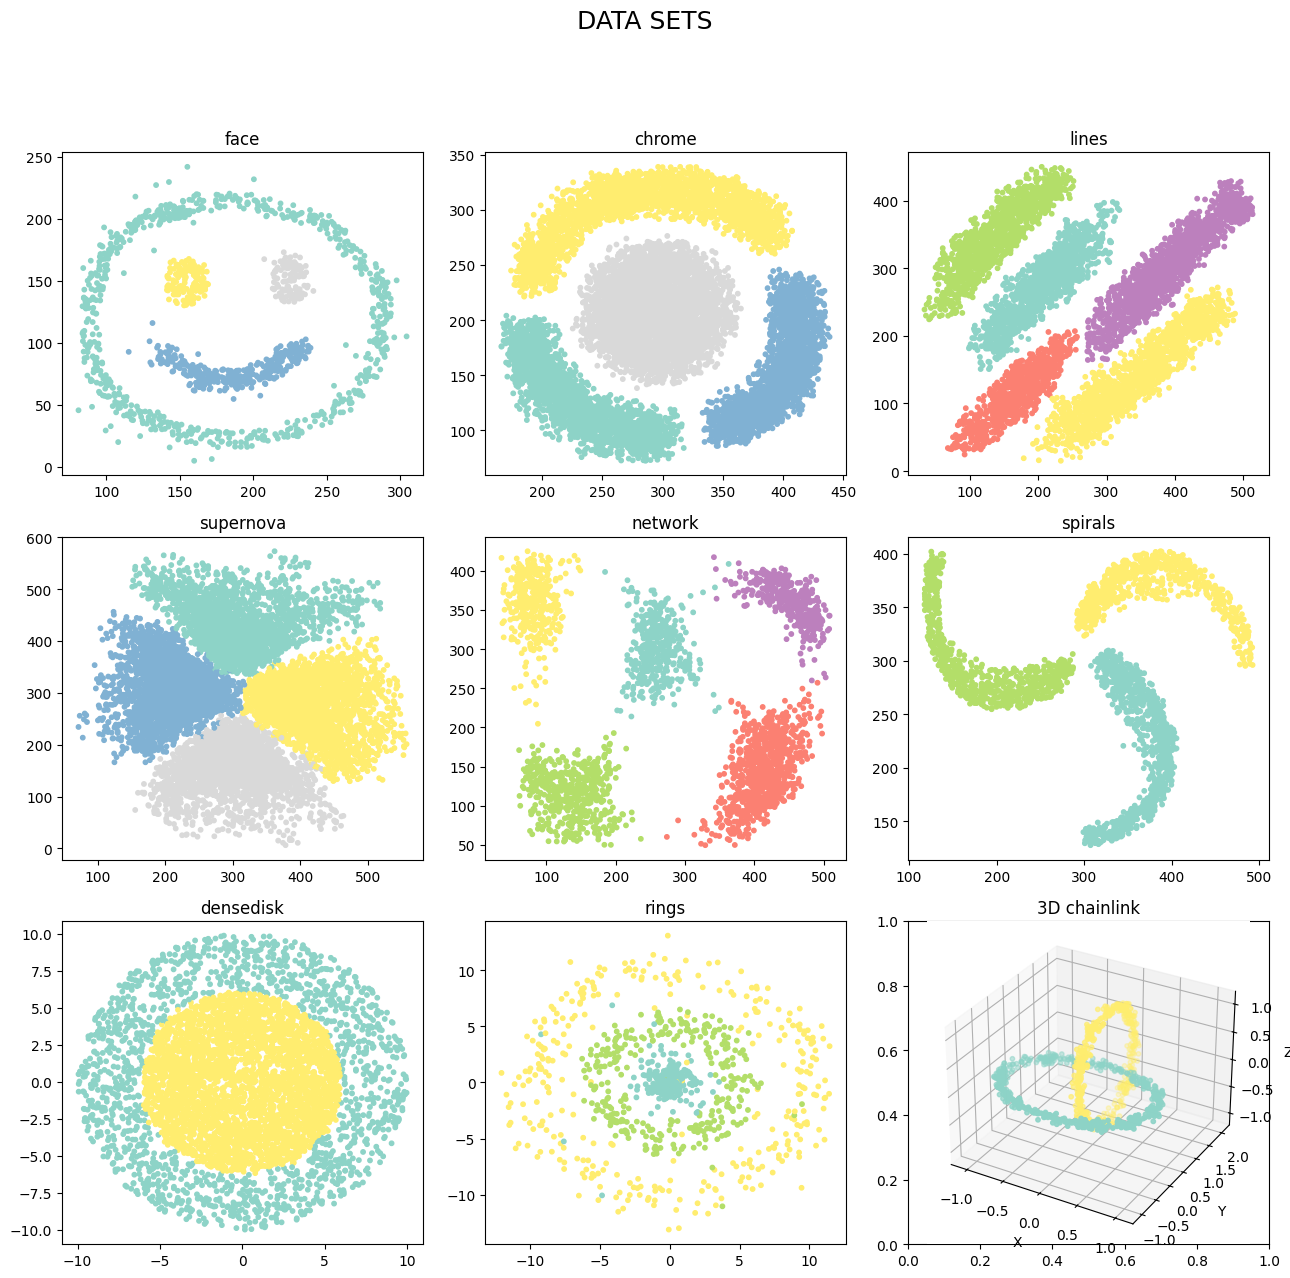

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")

axes[0, 1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 1].set_title("chrome")

axes[0, 2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("lines")

axes[1, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("supernova")

axes[1, 1].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[1, 1].set_title("network")

axes[1, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("spirals")

axes[2, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("densedisk")

axes[2, 1].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[2, 1].set_title("rings")

# Add a 3D plot
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

USE K-MEANS

1. Create each copy of the dataset for k-means

In [4]:
df_face_kmeans = face_df.copy()
df_chrome_kmeans = chrome_df.copy()
df_lines_kmeans = lines2_df.copy()
df_supernova_kmeans = supernova_df.copy()
df_network_kmeans = network_df.copy()
df_spirals_kmeans = spirals_df.copy()
df_densedisk_kmeans = densedisk_df.copy()
df_rings_kmeans = rings_df.copy()
df_chainlink_kmeans = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [5]:
df_face_kmeans.drop(['color'], axis = 1, inplace =True)
df_chrome_kmeans.drop(['color'], axis = 1, inplace =True)
df_lines_kmeans.drop(['color'], axis = 1, inplace =True)
df_supernova_kmeans.drop(['color'], axis = 1, inplace =True)
df_network_kmeans.drop(['color'], axis = 1, inplace =True)
df_spirals_kmeans.drop(['color'], axis = 1, inplace =True)
df_densedisk_kmeans.drop(['color'], axis = 1, inplace =True)
df_rings_kmeans.drop(['color'], axis = 1, inplace =True)
df_chainlink_kmeans.drop(['color'], axis = 1, inplace =True)


3. Train a K-means model for each dataset.

In [6]:


kmeans_face = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_chrome = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_lines = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans_supernova = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_network = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans_spirals = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_densedisk = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_rings = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_chainlink = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)


y_kmeans_face = kmeans_face.fit_predict(df_face_kmeans)
y_kmeans_chrome = kmeans_chrome.fit_predict(df_chrome_kmeans)
y_kmeans_lines = kmeans_lines.fit_predict(df_lines_kmeans)
y_kmeans_supernova = kmeans_supernova.fit_predict(df_supernova_kmeans)
y_kmeans_network = kmeans_network.fit_predict(df_network_kmeans)
y_kmeans_spirals = kmeans_spirals.fit_predict(df_spirals_kmeans)
y_kmeans_densedisk = kmeans_densedisk.fit_predict(df_densedisk_kmeans)
y_kmeans_rings = kmeans_rings.fit_predict(df_rings_kmeans)
y_kmeans_chainlink = kmeans_chainlink.fit_predict(df_chainlink_kmeans)

4. Add a "Cluster" column for each data set

In [7]:
# Creating 'Cluster' columns in data sets
df_face_kmeans['Cluster'] = y_kmeans_face
df_chrome_kmeans['Cluster'] = y_kmeans_chrome
df_lines_kmeans['Cluster'] = y_kmeans_lines
df_supernova_kmeans['Cluster'] = y_kmeans_supernova
df_network_kmeans['Cluster'] = y_kmeans_network
df_spirals_kmeans['Cluster'] = y_kmeans_spirals
df_densedisk_kmeans['Cluster'] = y_kmeans_densedisk
df_rings_kmeans['Cluster'] = y_kmeans_rings
df_chainlink_kmeans['Cluster'] = y_kmeans_chainlink

5. Plot the Correct cluster and the K-means cluster

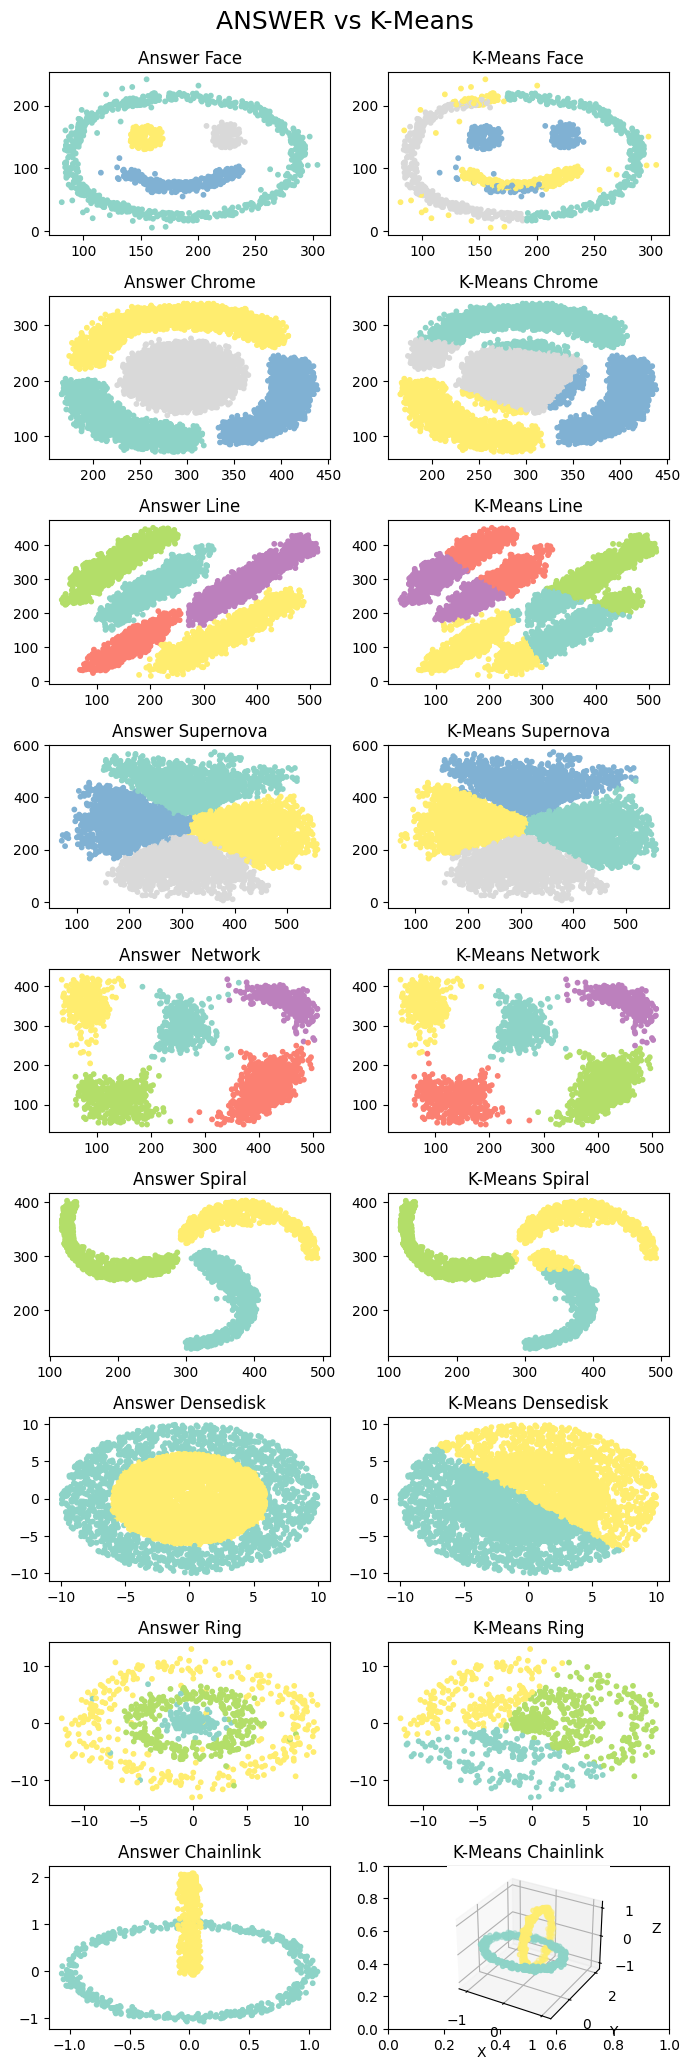

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig, axes = plt.subplots(nrows=9, ncols=2,figsize=(7,21))
fig.suptitle('ANSWER vs K-Means\n', size = 18)

axes[0,0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Face");
axes[0,1].scatter(df_face_kmeans['x'], df_face_kmeans['y'], c=df_face_kmeans['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("K-Means Face");

axes[1,0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Chrome");
axes[1,1].scatter(df_chrome_kmeans['x'], df_chrome_kmeans['y'], c=df_chrome_kmeans['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("K-Means Chrome");

axes[2,0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Line");
axes[2,1].scatter(df_lines_kmeans['x'], df_lines_kmeans['y'], c=df_lines_kmeans['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("K-Means Line");

axes[3,0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Supernova");
axes[3,1].scatter(df_supernova_kmeans['x'], df_supernova_kmeans['y'], c=df_supernova_kmeans['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("K-Means Supernova");

axes[4,0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer  Network");
axes[4,1].scatter(df_network_kmeans['x'], df_network_kmeans['y'], c=df_network_kmeans['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("K-Means Network");

axes[5,0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Spiral");
axes[5,1].scatter(df_spirals_kmeans['x'], df_spirals_kmeans['y'], c=df_spirals_kmeans['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("K-Means Spiral");

axes[6,0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap = "Set3")
axes[6,0].set_title("Answer Densedisk");
axes[6,1].scatter(df_densedisk_kmeans['x'], df_densedisk_kmeans['y'], c=df_densedisk_kmeans['Cluster'], s=10, cmap = "Set3")
axes[6,1].set_title("K-Means Densedisk");

axes[7,0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap = "Set3")
axes[7,0].set_title("Answer Ring");
axes[7,1].scatter(df_rings_kmeans['x'], df_rings_kmeans['y'], c=df_rings_kmeans['Cluster'], s=10, cmap = "Set3")
axes[7,1].set_title("K-Means Ring");


axes[8,0].scatter(chainlink_df['x'], chainlink_df['y'], c=chainlink_df['color'], s=10, cmap = "Set3")
axes[8,0].set_title("Answer Chainlink");

ax3d = fig.add_subplot(9, 2, 18, projection='3d')  # Specify the position

ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)

ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")
ax3d.set_title("K-Means Chainlink")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



B. Use Agglomerative Clustering to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [9]:
df_face_Agglo = face_df.copy()
df_chrome_Agglo = chrome_df.copy()
df_lines_Agglo = lines2_df.copy()
df_supernova_Agglo = supernova_df.copy()
df_network_Agglo = network_df.copy()
df_spirals_Agglo = spirals_df.copy()
df_densedisk_Agglo = densedisk_df.copy()
df_rings_Agglo = rings_df.copy()
df_chainlink_Agglo = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [10]:
df_face_Agglo.drop(['color'], axis = 1, inplace =True)
df_chrome_Agglo.drop(['color'], axis = 1, inplace =True)
df_lines_Agglo.drop(['color'], axis = 1, inplace =True)
df_supernova_Agglo.drop(['color'], axis = 1, inplace =True)
df_network_Agglo.drop(['color'], axis = 1, inplace =True)
df_spirals_Agglo.drop(['color'], axis = 1, inplace =True)
df_densedisk_Agglo.drop(['color'], axis = 1, inplace =True)
df_rings_Agglo.drop(['color'], axis = 1, inplace =True)
df_chainlink_Agglo.drop(['color'], axis = 1, inplace =True)

3. Train a Agglomerative Clustering model for each dataset.

In [11]:
from sklearn.cluster import AgglomerativeClustering

AgglomerativeC_face = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
AgglomerativeC_chrome = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
AgglomerativeC_lines = AgglomerativeClustering(n_clusters = 5, metric='euclidean', linkage = 'ward')
AgglomerativeC_supernova = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
AgglomerativeC_network = AgglomerativeClustering(n_clusters = 5, metric='euclidean', linkage = 'ward')
AgglomerativeC_spirals = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage = 'ward')
AgglomerativeC_densedisk = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage = 'ward')
AgglomerativeC_rings = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage = 'ward')
AgglomerativeC_chainlink = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage = 'ward')


y_AgglomerativeC_face = AgglomerativeC_face.fit_predict(df_face_Agglo)
y_AgglomerativeC_chrome = AgglomerativeC_chrome.fit_predict(df_chrome_Agglo)
y_AgglomerativeC_lines = AgglomerativeC_lines.fit_predict(df_lines_Agglo)
y_AgglomerativeC_supernova = AgglomerativeC_supernova.fit_predict(df_supernova_Agglo)
y_AgglomerativeC_network = AgglomerativeC_network.fit_predict(df_network_Agglo)
y_AgglomerativeC_spirals = AgglomerativeC_spirals.fit_predict(df_spirals_Agglo)
y_AgglomerativeC_densedisk = AgglomerativeC_densedisk.fit_predict(df_densedisk_Agglo)
y_AgglomerativeC_rings = AgglomerativeC_rings.fit_predict(df_rings_Agglo)
y_AgglomerativeC_chainlink= AgglomerativeC_chainlink.fit_predict(df_chainlink_Agglo)

4. Add a "Cluster" column for each data set

In [12]:
df_face_Agglo['Cluster'] = y_AgglomerativeC_face
df_chrome_Agglo['Cluster'] = y_AgglomerativeC_chrome
df_lines_Agglo['Cluster'] = y_AgglomerativeC_lines
df_supernova_Agglo['Cluster'] = y_AgglomerativeC_supernova
df_network_Agglo['Cluster'] = y_AgglomerativeC_network
df_spirals_Agglo['Cluster'] = y_AgglomerativeC_spirals
df_densedisk_Agglo['Cluster'] = y_AgglomerativeC_densedisk
df_rings_Agglo['Cluster'] = y_AgglomerativeC_rings
df_chainlink_Agglo['Cluster'] = y_AgglomerativeC_chainlink

5. Compare the two

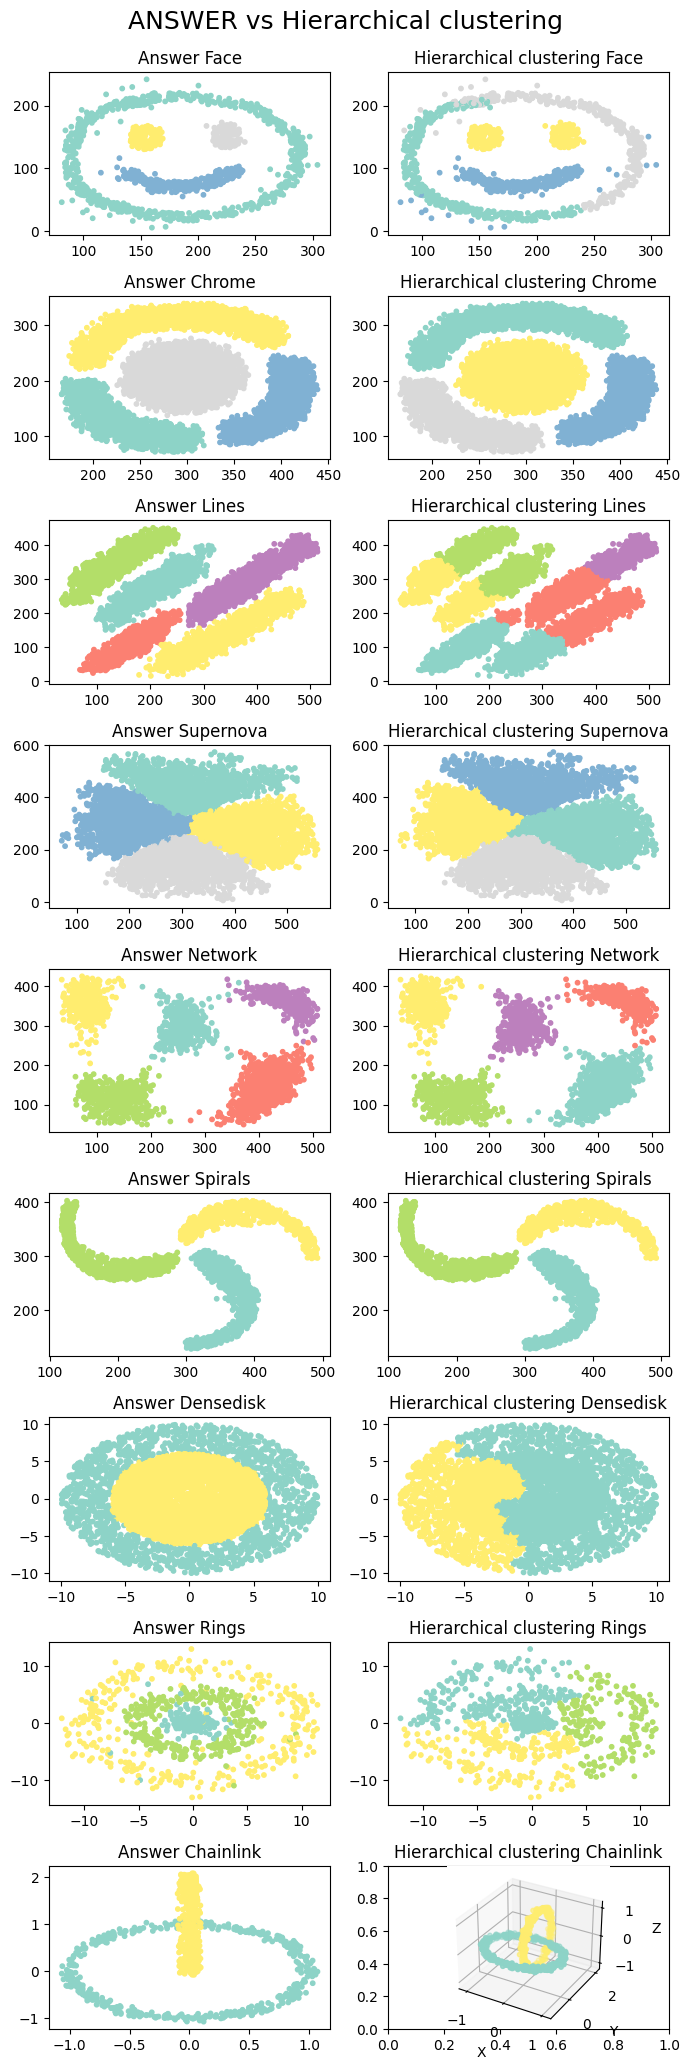

<Figure size 640x480 with 0 Axes>

In [13]:
fig, axes = plt.subplots(nrows=9, ncols=2,figsize=(7,21))
fig.suptitle('ANSWER vs Hierarchical clustering\n', size = 18)

axes[0,0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Face");
axes[0,1].scatter(df_face_Agglo['x'], df_face_Agglo['y'], c=df_face_Agglo['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("Hierarchical clustering Face");

axes[1,0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Chrome");
axes[1,1].scatter(df_chrome_Agglo['x'], df_chrome_Agglo['y'], c=df_chrome_Agglo['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("Hierarchical clustering Chrome");

axes[2,0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Lines");
axes[2,1].scatter(df_lines_Agglo['x'], df_lines_Agglo['y'], c=df_lines_Agglo['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("Hierarchical clustering Lines");

axes[3,0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Supernova");
axes[3,1].scatter(df_supernova_Agglo['x'], df_supernova_Agglo['y'], c=df_supernova_Agglo['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("Hierarchical clustering Supernova");

axes[4,0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer Network");
axes[4,1].scatter(df_network_Agglo['x'], df_network_Agglo['y'], c=df_network_Agglo['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("Hierarchical clustering Network");

axes[5,0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Spirals");
axes[5,1].scatter(df_spirals_Agglo['x'], df_spirals_Agglo['y'], c=df_spirals_Agglo['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("Hierarchical clustering Spirals");

axes[6,0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap = "Set3")
axes[6,0].set_title("Answer Densedisk");
axes[6,1].scatter(df_densedisk_Agglo['x'], df_densedisk_Agglo['y'], c=df_densedisk_Agglo['Cluster'], s=10, cmap = "Set3")
axes[6,1].set_title("Hierarchical clustering Densedisk");

axes[7,0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap = "Set3")
axes[7,0].set_title("Answer Rings");
axes[7,1].scatter(df_rings_Agglo['x'], df_rings_Agglo['y'], c=df_rings_Agglo['Cluster'], s=10, cmap = "Set3")
axes[7,1].set_title("Hierarchical clustering Rings");

axes[8,0].scatter(chainlink_df['x'], chainlink_df['y'], c=chainlink_df['color'], s=10, cmap = "Set3")
axes[8,0].set_title("Answer Chainlink");
ax3d = fig.add_subplot(9, 2, 18, projection='3d')  # Specify the position

ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)

ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")
ax3d.set_title("Hierarchical clustering Chainlink")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


plt.tight_layout()

C. Use DBSCAN to cluster each dataset



1. Create each copy of the dataset for Agglomerative Clustering


In [14]:
df_face_dbscan = face_df.copy()
df_chrome_dbscan = chrome_df.copy()
df_lines_dbscan = lines2_df.copy()
df_supernova_dbscan = supernova_df.copy()
df_network_dbscan = network_df.copy()
df_spirals_dbscan = spirals_df.copy()
df_densedisk_dbscan = densedisk_df.copy()
df_rings_dbscan = rings_df.copy()
df_chainlink_dbscan = chainlink_df.copy()

2. Drop the "color" column on all datasets


In [15]:
df_face_dbscan.drop(['color'], axis = 1, inplace =True)
df_chrome_dbscan.drop(['color'], axis = 1, inplace =True)
df_lines_dbscan.drop(['color'], axis = 1, inplace =True)
df_supernova_dbscan.drop(['color'], axis = 1, inplace =True)
df_network_dbscan.drop(['color'], axis = 1, inplace =True)
df_spirals_dbscan.drop(['color'], axis = 1, inplace =True)
df_densedisk_dbscan.drop(['color'], axis = 1, inplace =True)
df_rings_dbscan.drop(['color'], axis = 1, inplace =True)
df_chainlink_dbscan.drop(['color'], axis = 1, inplace =True)

3. Train a DBSCAN Clustering model for each dataset.

In [28]:
from sklearn.cluster import DBSCAN

DBScan_face = DBSCAN(eps=28, min_samples=12, metric='euclidean')
DBScan_chrome = DBSCAN(eps=8, min_samples=4, metric='euclidean')
DBScan_lines = DBSCAN(eps=9.5, min_samples=6, metric='euclidean')
DBScan_supernova = DBSCAN(eps=0.2, min_samples=100, metric='euclidean')
DBScan_network = DBSCAN(eps=26, min_samples=12, metric='euclidean')
DBScan_spirals = DBSCAN(eps=7.8, min_samples=4, metric='euclidean')
DBScan_densedisk = DBSCAN(eps=1, min_samples=2, metric='euclidean')
DBScan_rings = DBSCAN(eps=2, min_samples=60, metric='euclidean')
DBScan_chainlink = DBSCAN(eps=0.5, min_samples=2, metric='euclidean')

y_DBScan_face = DBScan_face.fit_predict(df_face_dbscan)
y_DBScan_chrome = DBScan_chrome.fit_predict(df_chrome_dbscan)
y_DBScan_lines = DBScan_lines.fit_predict(df_lines_dbscan)
y_DBScan_supernova = DBScan_supernova.fit_predict(df_supernova_dbscan)
y_DBScan_network = DBScan_network.fit_predict(df_network_dbscan)
y_DBScan_spirals = DBScan_spirals.fit_predict(df_spirals_dbscan)
y_DBScan_densedisk = DBScan_densedisk.fit_predict(df_densedisk_dbscan)
y_DBScan_rings = DBScan_rings.fit_predict(df_rings_dbscan)
y_DBScan_chainlink = DBScan_chainlink.fit_predict(df_chainlink_dbscan)

4. Add a "Cluster" column for each data set

In [29]:
df_face_dbscan['Cluster'] = y_DBScan_face
df_chrome_dbscan['Cluster'] = y_DBScan_chrome
df_lines_dbscan['Cluster'] = y_DBScan_lines
df_supernova_dbscan['Cluster'] = y_DBScan_supernova
df_network_dbscan['Cluster'] = y_DBScan_network
df_spirals_dbscan['Cluster'] = y_DBScan_spirals
df_densedisk_dbscan['Cluster'] = y_DBScan_densedisk
df_rings_dbscan['Cluster'] = y_DBScan_rings
df_chainlink_dbscan['Cluster'] = y_DBScan_chainlink

5. Compare and Plot

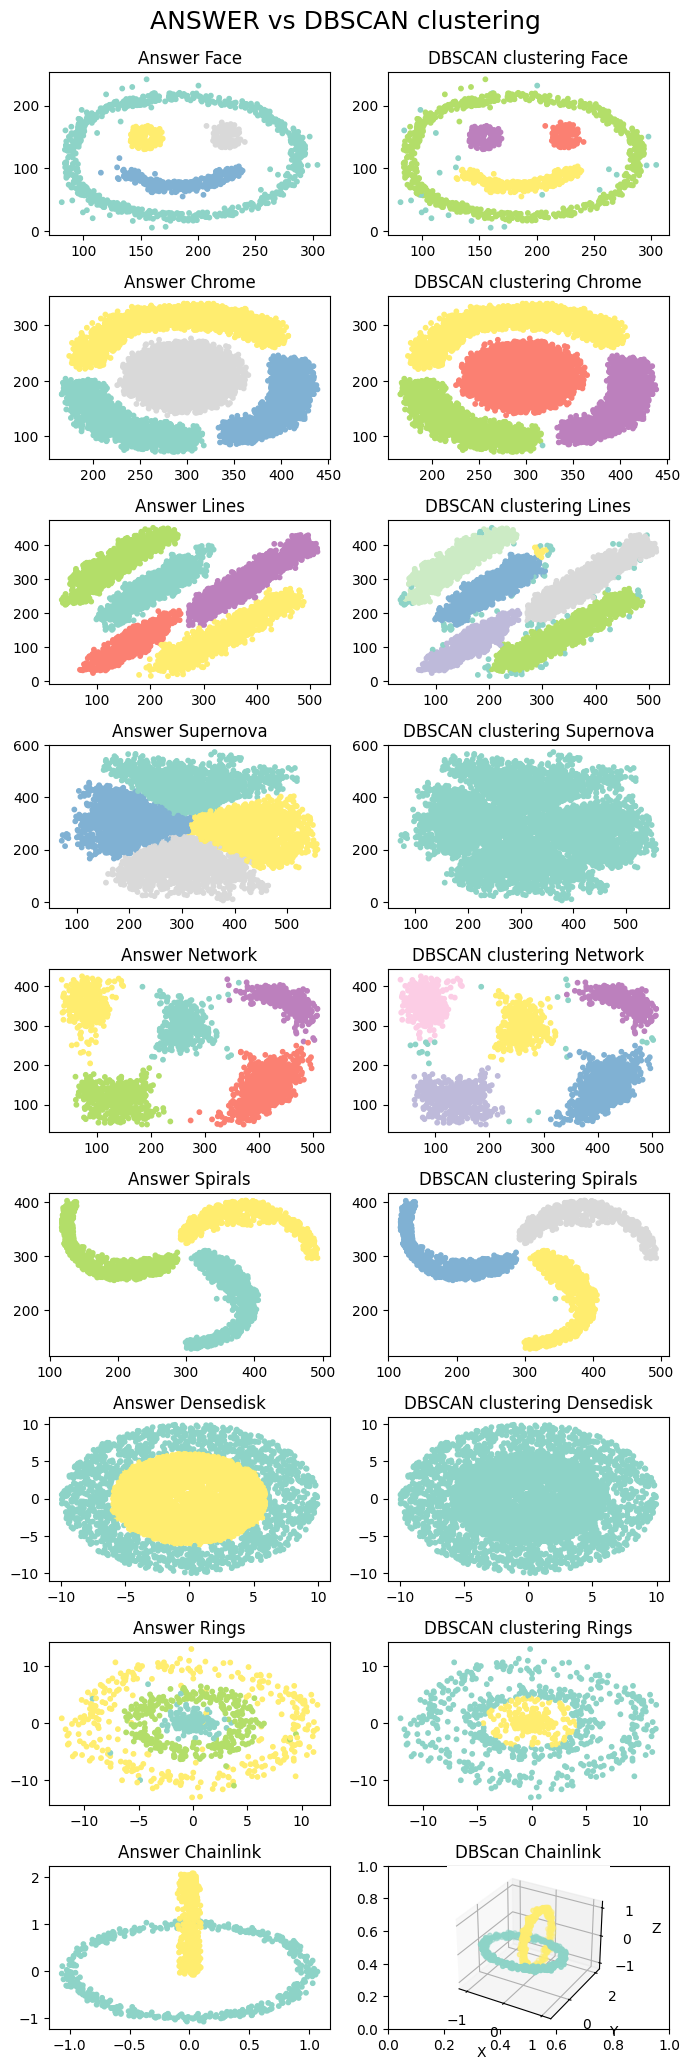

In [30]:
fig, axes = plt.subplots(nrows=9, ncols=2,figsize=(7,21))
fig.suptitle('ANSWER vs DBSCAN clustering\n', size = 18)

axes[0,0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Face");
axes[0,1].scatter(df_face_dbscan['x'], df_face_dbscan['y'], c=df_face_dbscan['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("DBSCAN clustering Face");

axes[1,0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Chrome");
axes[1,1].scatter(df_chrome_dbscan['x'], df_chrome_dbscan['y'], c=df_chrome_dbscan['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("DBSCAN clustering Chrome");

axes[2,0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Lines");
axes[2,1].scatter(df_lines_dbscan['x'], df_lines_dbscan['y'], c=df_lines_dbscan['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("DBSCAN clustering Lines");

axes[3,0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Supernova");
axes[3,1].scatter(df_supernova_dbscan['x'], df_supernova_dbscan['y'], c=df_supernova_dbscan['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("DBSCAN clustering Supernova");

axes[4,0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer Network");
axes[4,1].scatter(df_network_dbscan['x'], df_network_dbscan['y'], c=df_network_dbscan['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("DBSCAN clustering Network");

axes[5,0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Spirals");
axes[5,1].scatter(df_spirals_dbscan['x'], df_spirals_dbscan['y'], c=df_spirals_dbscan['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("DBSCAN clustering Spirals");

axes[6,0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap = "Set3")
axes[6,0].set_title("Answer Densedisk");
axes[6,1].scatter(df_densedisk_dbscan['x'], df_densedisk_dbscan['y'], c=df_densedisk_dbscan['Cluster'], s=10, cmap = "Set3")
axes[6,1].set_title("DBSCAN clustering Densedisk");

axes[7,0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap = "Set3")
axes[7,0].set_title("Answer Rings");
axes[7,1].scatter(df_rings_dbscan['x'], df_rings_dbscan['y'], c=df_rings_dbscan['Cluster'], s=10, cmap = "Set3")
axes[7,1].set_title("DBSCAN clustering Rings");

axes[8,0].scatter(chainlink_df['x'], chainlink_df['y'], c=chainlink_df['color'], s=10, cmap = "Set3")
axes[8,0].set_title("Answer Chainlink");
ax3d = fig.add_subplot(9, 2, 18, projection='3d')  # Specify the position
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)

ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")
ax3d.set_title("DBScan Chainlink")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



ALL

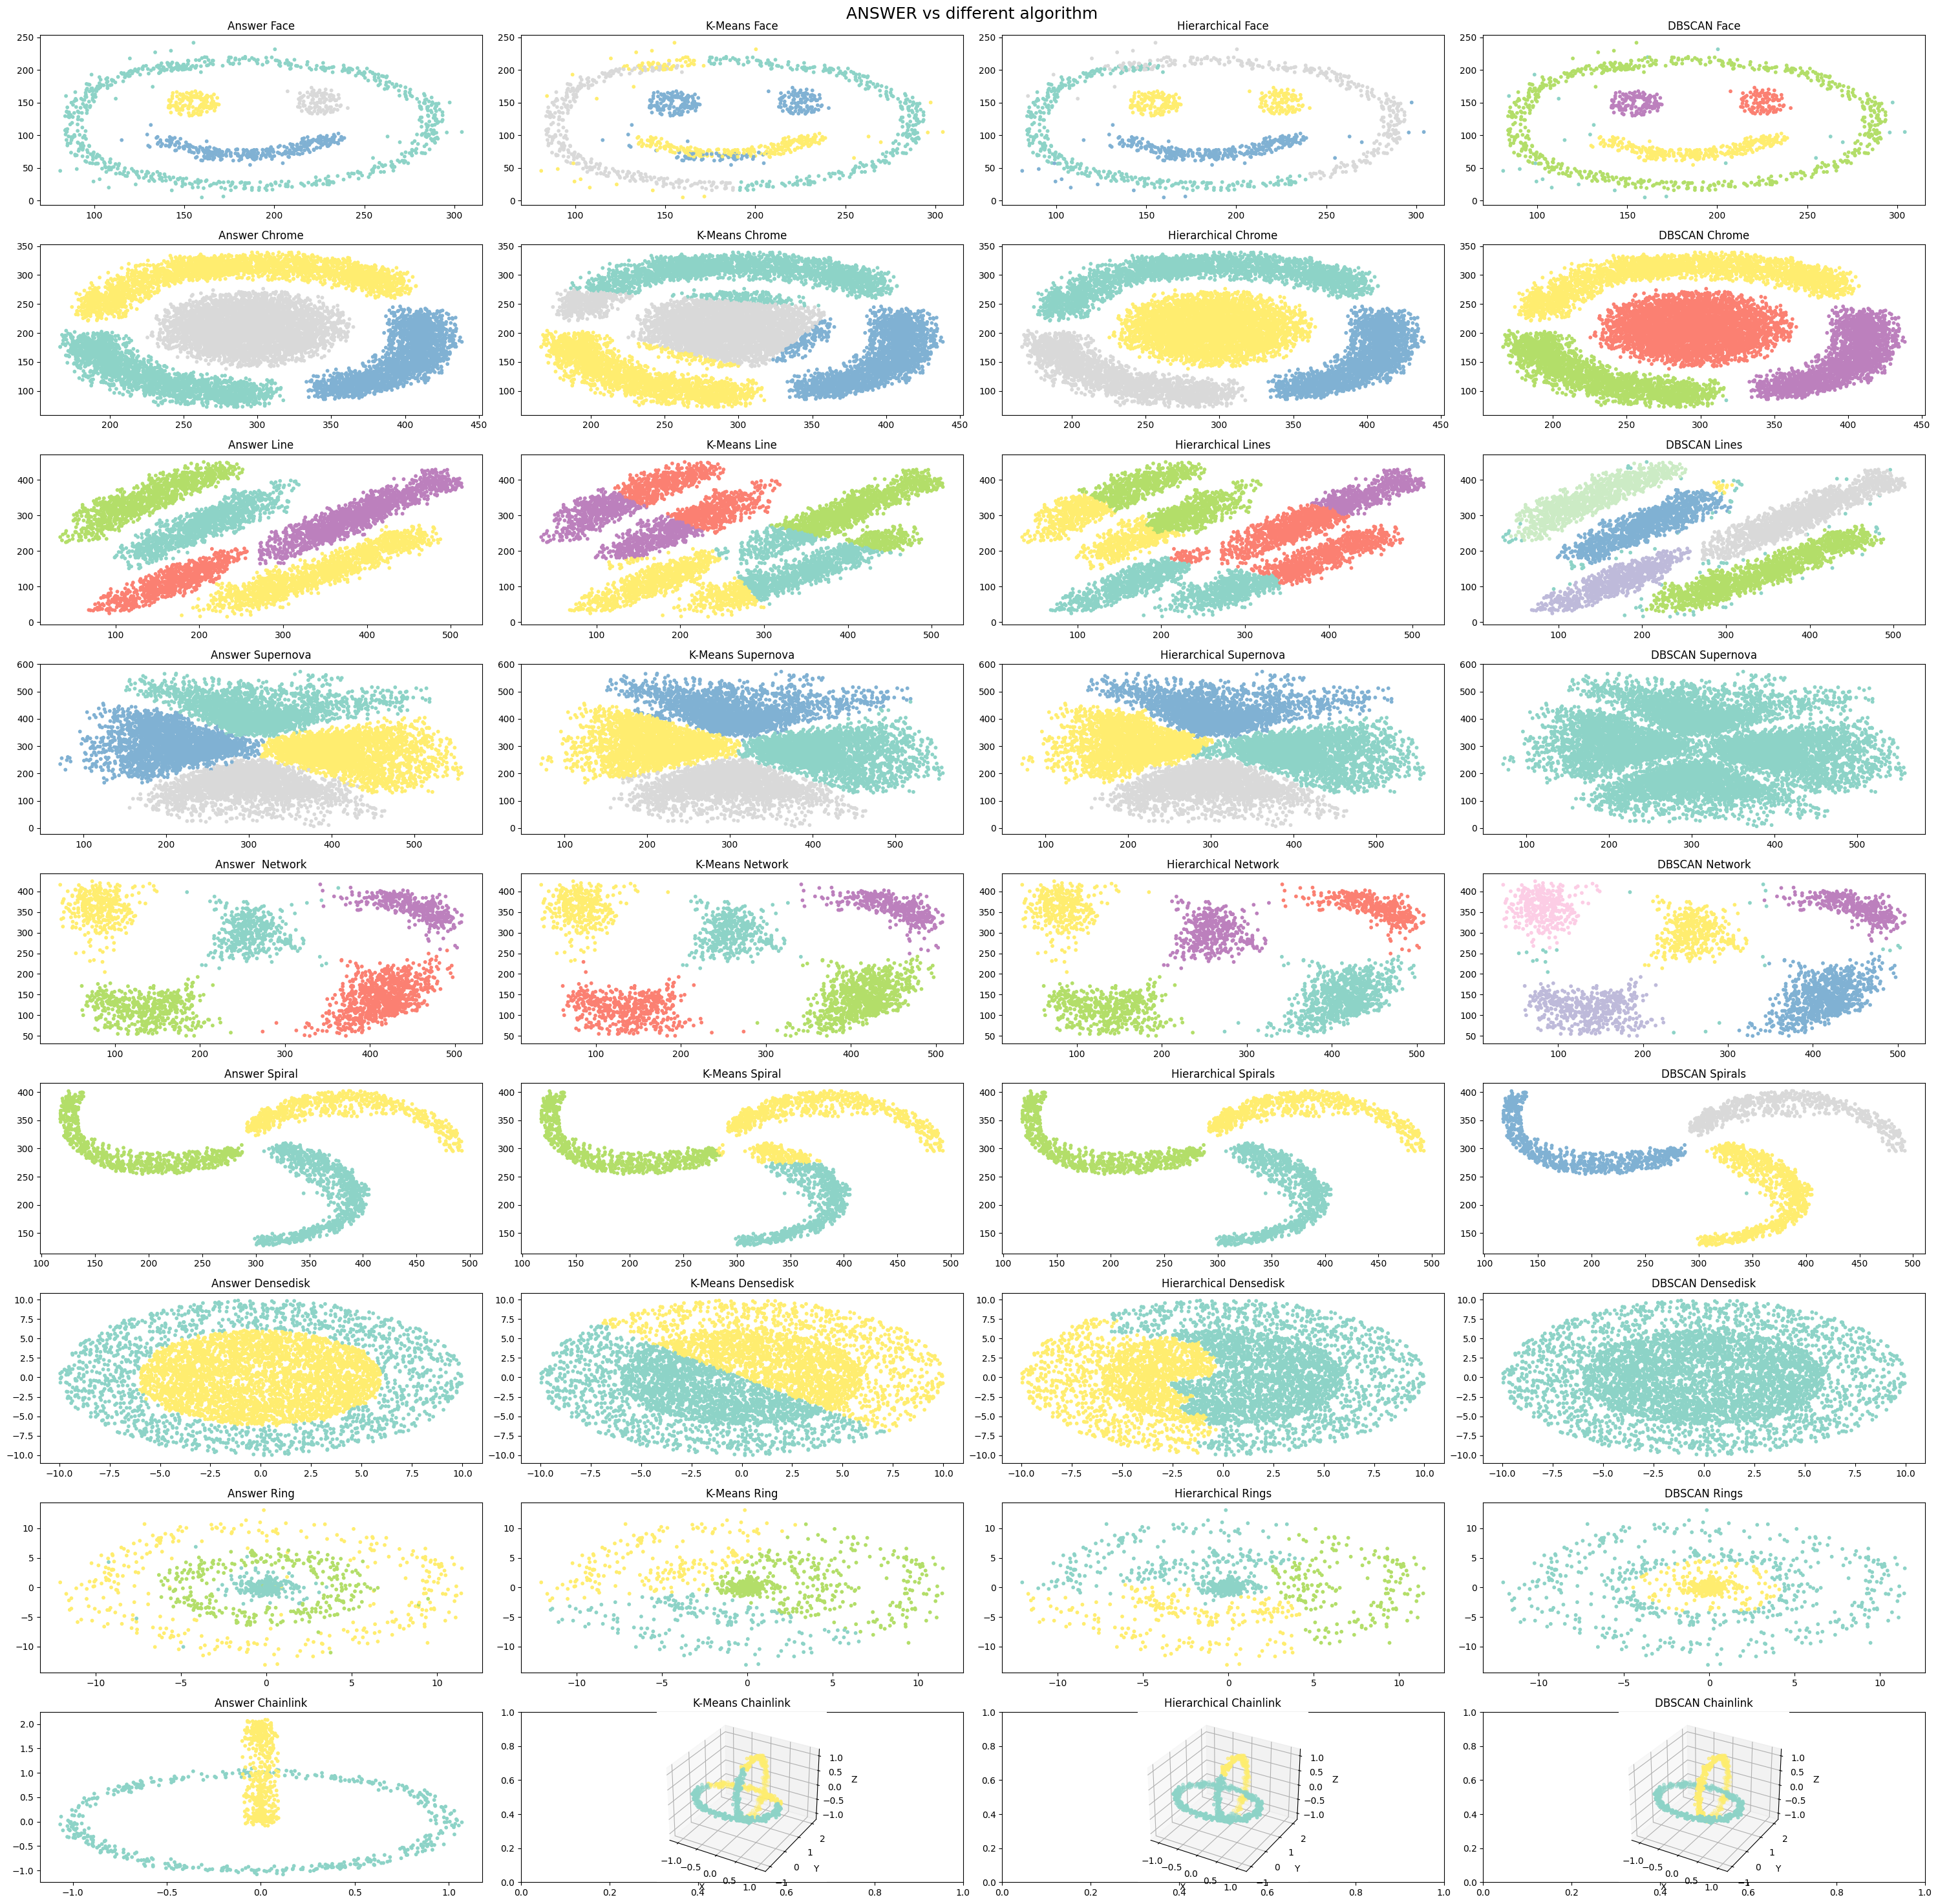

In [31]:
fig, axes = plt.subplots(nrows=9, ncols=4,figsize=(30,30))
fig.suptitle('ANSWER vs different algorithm\n', size = 18)

axes[0,0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Face");
axes[0,1].scatter(df_face_kmeans['x'], df_face_kmeans['y'], c=df_face_kmeans['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("K-Means Face");
axes[0,2].scatter(df_face_Agglo['x'], df_face_Agglo['y'], c=df_face_Agglo['Cluster'], s=10, cmap = "Set3")
axes[0,2].set_title("Hierarchical Face");
axes[0,3].scatter(df_face_dbscan['x'], df_face_dbscan['y'], c=df_face_dbscan['Cluster'], s=10, cmap = "Set3")
axes[0,3].set_title("DBSCAN Face");

axes[1,0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Chrome");
axes[1,1].scatter(df_chrome_kmeans['x'], df_chrome_kmeans['y'], c=df_chrome_kmeans['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("K-Means Chrome");
axes[1,2].scatter(df_chrome_Agglo['x'], df_chrome_Agglo['y'], c=df_chrome_Agglo['Cluster'], s=10, cmap = "Set3")
axes[1,2].set_title("Hierarchical Chrome");
axes[1,3].scatter(df_chrome_dbscan['x'], df_chrome_dbscan['y'], c=df_chrome_dbscan['Cluster'], s=10, cmap = "Set3")
axes[1,3].set_title("DBSCAN Chrome");

axes[2,0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Line");
axes[2,1].scatter(df_lines_kmeans['x'], df_lines_kmeans['y'], c=df_lines_kmeans['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("K-Means Line");
axes[2,2].scatter(df_lines_Agglo['x'], df_lines_Agglo['y'], c=df_lines_Agglo['Cluster'], s=10, cmap = "Set3")
axes[2,2].set_title("Hierarchical Lines");
axes[2,3].scatter(df_lines_dbscan['x'], df_lines_dbscan['y'], c=df_lines_dbscan['Cluster'], s=10, cmap = "Set3")
axes[2,3].set_title("DBSCAN Lines");

axes[3,0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Supernova");
axes[3,1].scatter(df_supernova_kmeans['x'], df_supernova_kmeans['y'], c=df_supernova_kmeans['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("K-Means Supernova");
axes[3,2].scatter(df_supernova_Agglo['x'], df_supernova_Agglo['y'], c=df_supernova_Agglo['Cluster'], s=10, cmap = "Set3")
axes[3,2].set_title("Hierarchical Supernova");
axes[3,3].scatter(df_supernova_dbscan['x'], df_supernova_dbscan['y'], c=df_supernova_dbscan['Cluster'], s=10, cmap = "Set3")
axes[3,3].set_title("DBSCAN Supernova");

axes[4,0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer  Network");
axes[4,1].scatter(df_network_kmeans['x'], df_network_kmeans['y'], c=df_network_kmeans['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("K-Means Network");
axes[4,2].scatter(df_network_Agglo['x'], df_network_Agglo['y'], c=df_network_Agglo['Cluster'], s=10, cmap = "Set3")
axes[4,2].set_title("Hierarchical Network");
axes[4,3].scatter(df_network_dbscan['x'], df_network_dbscan['y'], c=df_network_dbscan['Cluster'], s=10, cmap = "Set3")
axes[4,3].set_title("DBSCAN Network");

axes[5,0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Spiral");
axes[5,1].scatter(df_spirals_kmeans['x'], df_spirals_kmeans['y'], c=df_spirals_kmeans['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("K-Means Spiral");
axes[5,2].scatter(df_spirals_Agglo['x'], df_spirals_Agglo['y'], c=df_spirals_Agglo['Cluster'], s=10, cmap = "Set3")
axes[5,2].set_title("Hierarchical Spirals");
axes[5,3].scatter(df_spirals_dbscan['x'], df_spirals_dbscan['y'], c=df_spirals_dbscan['Cluster'], s=10, cmap = "Set3")
axes[5,3].set_title("DBSCAN Spirals");

axes[6,0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap = "Set3")
axes[6,0].set_title("Answer Densedisk");
axes[6,1].scatter(df_densedisk_kmeans['x'], df_densedisk_kmeans['y'], c=df_densedisk_kmeans['Cluster'], s=10, cmap = "Set3")
axes[6,1].set_title("K-Means Densedisk");
axes[6,2].scatter(df_densedisk_Agglo['x'], df_densedisk_Agglo['y'], c=df_densedisk_Agglo['Cluster'], s=10, cmap = "Set3")
axes[6,2].set_title("Hierarchical Densedisk");
axes[6,3].scatter(df_densedisk_dbscan['x'], df_densedisk_dbscan['y'], c=df_densedisk_dbscan['Cluster'], s=10, cmap = "Set3")
axes[6,3].set_title("DBSCAN Densedisk");

axes[7,0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap = "Set3")
axes[7,0].set_title("Answer Ring");
axes[7,1].scatter(df_rings_kmeans['x'], df_rings_kmeans['y'], c=df_rings_kmeans['Cluster'], s=10, cmap = "Set3")
axes[7,1].set_title("K-Means Ring");
axes[7,2].scatter(df_rings_Agglo['x'], df_rings_Agglo['y'], c=df_rings_Agglo['Cluster'], s=10, cmap = "Set3")
axes[7,2].set_title("Hierarchical Rings");
axes[7,3].scatter(df_rings_dbscan['x'], df_rings_dbscan['y'], c=df_rings_dbscan['Cluster'], s=10, cmap = "Set3")
axes[7,3].set_title("DBSCAN Rings");


axes[8,0].scatter(chainlink_df['x'], chainlink_df['y'], c=chainlink_df['color'], s=10, cmap = "Set3")
axes[8,0].set_title("Answer Chainlink");

# Correct alignment of the Chainlink row
axes[8, 1] = fig.add_subplot(9, 4, 34, projection='3d')  # Position for K-Means Chainlink
axes[8, 1].scatter(df_chainlink_kmeans['x'], df_chainlink_kmeans['y'], df_chainlink_kmeans['z'],
                   c=df_chainlink_kmeans['Cluster'], cmap="Set3", s=10)
axes[8, 1].set_xlabel("X")
axes[8, 1].set_ylabel("Y")
axes[8, 1].set_zlabel("Z")
axes[8, 1].set_title("K-Means Chainlink")

axes[8, 2] = fig.add_subplot(9, 4, 35, projection='3d')  # Position for Hierarchical Chainlink
axes[8, 2].scatter(df_chainlink_Agglo['x'], df_chainlink_Agglo['y'], df_chainlink_Agglo['z'],
                   c=df_chainlink_Agglo['Cluster'], cmap="Set3", s=10)
axes[8, 2].set_xlabel("X")
axes[8, 2].set_ylabel("Y")
axes[8, 2].set_zlabel("Z")
axes[8, 2].set_title("Hierarchical Chainlink")

axes[8, 3] = fig.add_subplot(9, 4, 36, projection='3d')  # Position for DBSCAN Chainlink
axes[8, 3].scatter(df_chainlink_dbscan['x'], df_chainlink_dbscan['y'], df_chainlink_dbscan['z'],
                   c=df_chainlink_dbscan['Cluster'], cmap="Set3", s=10)
axes[8, 3].set_xlabel("X")
axes[8, 3].set_ylabel("Y")
axes[8, 3].set_zlabel("Z")
axes[8, 3].set_title("DBSCAN Chainlink")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()





